In [1]:
# modeling_exercises

# Modeling Exercises

1. Select a dataset with a continuous target variable.

2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [2]:
# imports
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# importing 'swiss' data
swiss = data('swiss')

In [4]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [5]:
# renaming 'infant.mortality' column
swiss['Infant_Mortality'] = swiss['Infant.Mortality']

In [6]:
# dropping the old column to eliminate confusion
swiss.drop('Infant.Mortality', inplace=True, axis=1)

In [7]:
def train_validate_test(df, target):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [8]:
X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(swiss, 'Infant_Mortality')

In [9]:
# taking a look at 'X_test'
X_test.shape

(10, 5)

In [10]:
X_test

,Fertility,Agriculture,Examination,Education,Catholic
Gruyere,82.4,53.3,12,7,97.67
Aigle,64.1,62.0,21,12,8.52
V. De Geneve,35.0,1.2,37,53,42.34
La Vallee,54.3,15.2,31,20,2.15
ValdeTravers,67.6,18.7,25,7,8.65
Entremont,69.3,84.9,7,6,99.68
Val de Ruz,77.6,37.6,15,7,4.97
Veveyse,87.1,64.5,14,6,98.61
Porrentruy,76.1,35.3,9,7,90.57
Delemont,83.1,45.1,6,9,84.84


In [11]:
X_train

,Fertility,Agriculture,Examination,Education,Catholic
Rolle,60.5,60.8,16,10,7.72
Lavaux,65.1,73.0,19,9,2.84
Nyone,56.6,50.9,22,12,15.14
Conthey,75.5,85.9,3,2,99.71
Yverdon,65.4,49.5,15,8,6.10
Oron,72.5,71.2,12,1,2.40
Cossonay,61.7,69.3,22,5,2.82
St Maurice,65.0,75.9,9,9,99.06
Franches-Mnt,92.5,39.7,5,5,93.40
Orbe,57.4,54.1,20,6,4.20


In [12]:

def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # create a mask of columns whether they are object type or not
    mask = np.array(df.dtypes == "object")

        
    # get a list of the column names that are objects (from the mask)
    object_cols = df.iloc[:, mask].columns.tolist()
    
    return object_cols

In [13]:
object_cols = get_object_cols(swiss)

In [14]:

def get_numeric_X_cols(X_train, object_cols):
    '''
    takes in a dataframe and list of object column names
    and returns a list of all other columns names, the non-objects. 
    '''
    numeric_cols = [col for col in X_train.columns.values if col not in object_cols]
    
    return numeric_cols

In [15]:
numeric_cols = get_numeric_X_cols(X_train, object_cols)

In [16]:
def min_max_scale(X_train, X_validate, X_test, numeric_cols):
    '''
    this function takes in 3 dataframes with the same columns, 
    a list of numeric column names (because the scaler can only work with numeric columns),
    and fits a min-max scaler to the first dataframe and transforms all
    3 dataframes using that scaler. 
    it returns 3 dataframes with the same column names and scaled values. 
    '''
    # create the scaler object and fit it to X_train (i.e. identify min and max)
    # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).


    scaler = MinMaxScaler(copy=True).fit(X_train[numeric_cols])

    #scale X_train, X_validate, X_test using the mins and maxes stored in the scaler derived from X_train. 
    # 
    X_train_scaled_array = scaler.transform(X_train[numeric_cols])
    X_validate_scaled_array = scaler.transform(X_validate[numeric_cols])
    X_test_scaled_array = scaler.transform(X_test[numeric_cols])

    # convert arrays to dataframes
    X_train_scaled = pd.DataFrame(X_train_scaled_array, 
                                  columns=numeric_cols).\
                                  set_index([X_train.index.values])

    X_validate_scaled = pd.DataFrame(X_validate_scaled_array, 
                                     columns=numeric_cols).\
                                     set_index([X_validate.index.values])

    X_test_scaled = pd.DataFrame(X_test_scaled_array, 
                                 columns=numeric_cols).\
                                 set_index([X_test.index.values])

    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [17]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [18]:
y_train.head()

Rolle      16.3
Lavaux     20.0
Nyone      16.7
Conthey    15.1
Yverdon    22.5
Name: Infant_Mortality, dtype: float64

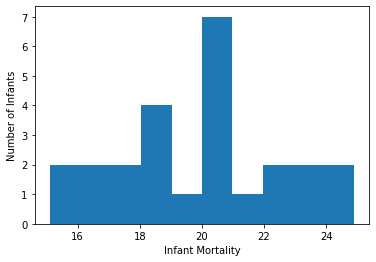

In [19]:

plt.hist(y_train)
plt.xlabel("Infant Mortality")
plt.ylabel("Number of Infants")
plt.show()

In [20]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict IM_pred_mean
IM_pred_mean = y_train['Infant_Mortality'].mean()
y_train['IM_pred_mean'] = IM_pred_mean
y_validate['IM_pred_mean'] = IM_pred_mean

# 2. compute IM_pred_median
IM_pred_median = y_train['Infant_Mortality'].median()
y_train['IM_pred_median'] = IM_pred_median
y_validate['IM_pred_median'] = IM_pred_median

# 3. RMSE of IM_pred_mean
rmse_train = mean_squared_error(y_train.Infant_Mortality, y_train.IM_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.Infant_Mortality, y_validate.IM_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of IM_pred_median
rmse_train = mean_squared_error(y_train.Infant_Mortality, y_train.IM_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.Infant_Mortality, y_validate.IM_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  2.61 
Validate/Out-of-Sample:  2.03
RMSE using Median
Train/In-Sample:  2.61 
Validate/Out-of-Sample:  2.02


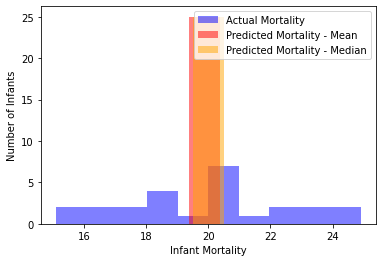

In [21]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.Infant_Mortality, color='blue', alpha=.5, label="Actual Mortality")
plt.hist(y_train.IM_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Mortality - Mean")
plt.hist(y_train.IM_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Mortality - Median")
plt.xlabel("Infant Mortality")
plt.ylabel("Number of Infants")
plt.legend()
plt.show()

In [22]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.Infant_Mortality)

# predict train
y_train['IM_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Infant_Mortality, y_train.IM_pred_lm)**(1/2)

# predict validate
y_validate['IM_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Infant_Mortality, y_validate.IM_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1.6657471472767973 
Validation/Out-of-Sample:  3.2457238104762465


In [23]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.Infant_Mortality)

# predict train
y_train['IM_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Infant_Mortality, y_train.IM_pred_lars)**(1/2)

# predict validate
y_validate['IM_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Infant_Mortality, y_validate.IM_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  2.6100850560853375 
Validation/Out-of-Sample:  2.0288147607244316


In [24]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [25]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.Infant_Mortality)

# predict train
y_train['IM_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Infant_Mortality, y_train.IM_pred_lm2)**(1/2)

# predict validate
y_validate['IM_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Infant_Mortality, y_validate.IM_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  1.121664271953492 
Validation/Out-of-Sample:  4.027784473994322


AttributeError: 'DataFrame' object has no attribute 'IM_pred_glm'

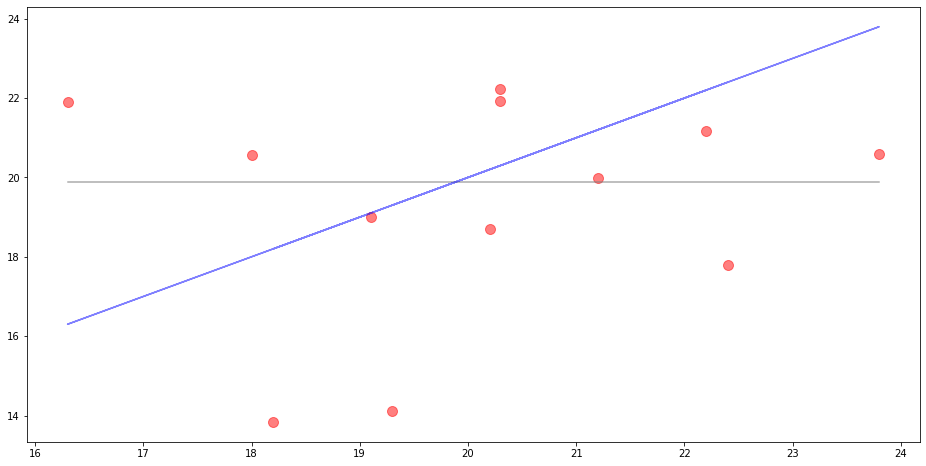

In [27]:

plt.figure(figsize=(16,8))
plt.plot(y_validate.Infant_Mortality, y_validate.IM_pred_mean, alpha=.5, color="gray", label='_nolegend_')
#plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.Infant_Mortality, y_validate.Infant_Mortality, alpha=.5, color="blue", label='_nolegend_')
#plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.Infant_Mortality, y_validate.IM_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Infant_Mortality, y_validate.IM_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Infant_Mortality, y_validate.IM_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()